# Model Selection, Underfitting, and Overfitting

As machine learning scientists,
our goal is to discover *patterns*.
But how can we be sure that we have
truly discovered a *general* pattern
and not simply memorized our data?

To recapitulate more formally,
our goal is to discover patterns
that capture regularities in the underlying population
from which our training set was drawnTo recapitulate more formally,
our goal is to discover patterns
that capture regularities in the underlying population
from which our training set was drawn.
If we are successful in this endeavor,
then we could successfully assess risk
even for individuals that we have never encountered before.
This problem---how to discover patterns that *generalize*---is
the fundamental problem of machine learning.

The danger is that when we train models,
we access just a small sample of data.
The largest public image datasets contain
roughly one million images.
More often, we must learn from only thousands
or tens of thousands of data examples.
In a large hospital system, we might access
hundreds of thousands of medical records.
When working with finite samples, we run the risk
that we might discover apparent associations
that turn out not to hold up when we collect more data.

The phenomenon of fitting our training data
more closely than we fit the underlying distribution is called *overfitting*, and the techniques used to combat overfitting are called *regularization*.

## Training Error and Generalization Error

In order to discuss this phenomenon more formally,
we need to differentiate between training error and generalization error.
The *training error* is the error of our model
as calculated on the training dataset,
while *generalization error* is the expectation of our model's error
were we to apply it to an infinite stream of additional data examples
drawn from the same underlying data distribution as our original sample.

Problematically, we can never calculate the generalization error exactly.
That is because the stream of infinite data is an imaginary object.
In practice, we must *estimate* the generalization error
by applying our model to an independent test set
constituted of a random selection of data examples
that were withheld from our training set.

### Statistical Learning Theory

Since generalization is the fundamental problem in machine learning.

In the standard supervised learning setting, which we have addressed up until now and will stick with throughout most of this book,
we assume that both the training data and the test data
are drawn *independently* from *identical* distributions.
This is commonly called the *i.i.d. assumption*,
which means that the process that samples our data has no memory.

Sometimes we can get away with minor violations of the i.i.d. assumption
and our models will continue to work remarkably well.
After all, nearly every real-world application
involves at least some minor violation of the i.i.d. assumption,
and yet we have many useful tools for
various applications such as
face recognition,
speech recognition, and language translation.

For now, even taking the i.i.d. assumption for granted,
understanding generalization is a formidable problem.
Moreover, elucidating the precise theoretical foundations
that might explain why deep neural networks generalize as well as they do
continues to vex the greatest minds in learning theory.

When we train our models, we attempt to search for a function
that fits the training data as well as possible.
If the function is so flexible that it can catch on to spurious patterns
just as easily as to true associations,
then it might perform *too well* without producing a model
that generalizes well to unseen data.
This is precisely what we want to avoid or at least control.
Many of the techniques in deep learning are heuristics and tricks
aimed at guarding against overfitting.

### Model Complexity

When we have simple models and abundant data,
we expect the generalization error to resemble the training error.
When we work with more complex models and fewer examples,
we expect the training error to go down but the generalization gap to grow.
What precisely constitutes model complexity is a complex matter.
Many factors govern whether a model will generalize well.
For example a model with more parameters might be considered more complex.
A model whose parameters can take a wider range of values
might be more complex.
Often with neural networks, we think of a model
that takes more training iterations as more complex,
and one subject to *early stopping* (fewer training iterations) as less complex.

It can be difficult to compare the complexity among members
of substantially different model classes
(say, decision trees vs. neural networks).
For now, a simple rule of thumb is quite useful:
a model that can readily explain arbitrary facts
is what statisticians view as complex,
whereas one that has only a limited expressive power
but still manages to explain the data well
is probably closer to the truth.

In this section, to give you some intuition,
we will focus on a few factors that tend
to influence the generalizability of a model class:

1. The number of tunable parameters. When the number of tunable parameters, sometimes called the *degrees of freedom*, is large, models tend to be more susceptible to overfitting.
1. The values taken by the parameters. When weights can take a wider range of values, models can be more susceptible to overfitting.
1. The number of training examples. It is trivially easy to overfit a dataset containing only one or two examples even if your model is simple. But overfitting a dataset with millions of examples requires an extremely flexible model.

## Model Selection

In machine learning, we usually select our final model
after evaluating several candidate models.
This process is called *model selection*.
Sometimes the models subject to comparison
are fundamentally different in nature
(say, decision trees vs. linear models).
At other times, we are comparing
members of the same class of models
that have been trained with different hyperparameter settings.

With MLPs, for example,
we may wish to compare models with
different numbers of hidden layers,
different numbers of hidden units,
and various choices of the activation functions
applied to each hidden layer.
In order to determine the best among our candidate models,
we will typically employ a validation dataset.

### Validation Dataset

In principle we should not touch our test set
until after we have chosen all our hyperparameters.
We should never rely on the test data for model selection.
And yet we cannot rely solely on the training data
for model selection either because
we cannot estimate the generalization error
on the very data that we use to train the model.

In practical applications,
real-world test data is seldom discarded after just one use.

The common practice to address this problem
is to split our data three ways,
incorporating a *validation dataset* (or *validation set*)
in addition to the training and test datasets.

### $K$-Fold Cross-Validation

When training data is scarce,
we might not even be able to afford to hold out
enough data to constitute a proper validation set.
One popular solution to this problem is to employ
$K$*-fold cross-validation*.
Here, the original training data is split into $K$ non-overlapping subsets.
Then model training and validation are executed $K$ times,
each time training on $K-1$ subsets and validating
on a different subset (the one not used for training in that round).
Finally, the training and validation errors are estimated
by averaging over the results from the $K$ experiments.

## Underfitting or Overfitting?

When we compare the training and validation errors,
we want to be mindful of two common situations.
First, we want to watch out for cases
when our training error and validation error are both substantial
but there is a little gap between them.
If the model is unable to reduce the training error,
that could mean that our model is too simple
(i.e., insufficiently expressive)
to capture the pattern that we are trying to model.
Moreover, since the *generalization gap*
between our training and validation errors is small,
we have reason to believe that we could get away with a more complex model.
This phenomenon is known as *underfitting*.

On the other hand, as we discussed above,
we want to watch out for the cases
when our training error is significantly lower
than our validation error, indicating severe *overfitting*.
Note that overfitting is not always a bad thing.
With deep learning especially, it is well known
that the best predictive models often perform
far better on training data than on holdout data.
Ultimately, we usually care more about the validation error
than about the gap between the training and validation errors.

Whether we overfit or underfit can depend
both on the complexity of our model
and the size of the available training datasets,
two topics that we discuss below.

### Model Complexity

To illustrate some classical intuition
about overfitting and model complexity,
we give an example using polynomials.
Given training data consisting of a single feature $x$
and a corresponding real-valued label $y$,
we try to find the polynomial of degree $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

to estimate the labels $y$.
This is just a linear regression problem
where our features are given by the powers of $x$,
the model's weights are given by $w_i$,
and the bias is given by $w_0$ since $x^0 = 1$ for all $x$.
Since this is just a linear regression problem,
we can use the squared error as our loss function.

A higher-order polynomial function is more complex
than a lower-order polynomial function,
since the higher-order polynomial has more parameters
and the model function's selection range is wider.
Fixing the training dataset,
higher-order polynomial functions should always
achieve lower (at worst, equal) training error
relative to lower degree polynomials.
In fact, whenever the data examples each have a distinct value of $x$,
a polynomial function with degree equal to the number of data examples
can fit the training set perfectly.
We visualize the relationship between polynomial degree
and underfitting vs. overfitting.

![](../img/capacity-vs-error.svg) Influence of model complexity on underfitting and overfitting

### Dataset Size

The other big consideration to bear in mind is the dataset size.
Fixing our model, the fewer samples we have in the training dataset,
the more likely (and more severely) we are to encounter overfitting.
As we increase the amount of training data,
the generalization error typically decreases.
Moreover, in general, more data never hurt.
For a fixed task and data distribution,
there is typically a relationship between model complexity and dataset size.
Given more data, we might profitably attempt to fit a more complex model.
Absent sufficient data, simpler models may be more difficult to beat.
For many tasks, deep learning only outperforms linear models
when many thousands of training examples are available.
In part, the current success of deep learning
owes to the current abundance of massive datasets
due to Internet companies, cheap storage, connected devices,
and the broad digitization of the economy.

## Polynomial Regression

In [1]:
from d2l import torch as d2l
import torch
from torch import nn
import numpy as np
import math

### Generating the Dataset

First we need data. Given $x$, we will use the following cubic polynomial to generate the labels on training and test data:

$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$

The noise term $\epsilon$ obeys a normal distribution
with a mean of 0 and a standard deviation of 0.1.
For optimization, we typically want to avoid
very large values of gradients or losses.
This is why the *features*
are rescaled from $x^i$ to $\frac{x^i}{i!}$.
It allows us to avoid very large values for large exponents $i$.
We will synthesize 100 samples each for the training set and test set.

In [2]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

Again, monomials stored in `poly_features`
are rescaled by the gamma function,
where $\Gamma(n)=(n-1)!$.

In [3]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.6475],
         [-0.3333]]),
 tensor([[ 1.0000e+00, -6.4754e-01,  2.0965e-01, -4.5253e-02,  7.3258e-03,
          -9.4875e-04,  1.0239e-04, -9.4719e-06,  7.6668e-07, -5.5162e-08,
           3.5719e-09, -2.1027e-10,  1.1347e-11, -5.6518e-13,  2.6141e-14,
          -1.1285e-15,  4.5672e-17, -1.7397e-18,  6.2583e-20, -2.1329e-21],
         [ 1.0000e+00, -3.3334e-01,  5.5559e-02, -6.1734e-03,  5.1447e-04,
          -3.4299e-05,  1.9056e-06, -9.0744e-08,  3.7811e-09, -1.4005e-10,
           4.6683e-12, -1.4147e-13,  3.9298e-15, -1.0077e-16,  2.3993e-18,
          -5.3320e-20,  1.1109e-21, -2.1782e-23,  4.0339e-25, -7.0773e-27]]),
 tensor([3.1471, 4.0887]))

### Training and Testing the Model

Let us first implement a function to evaluate the loss on a given dataset.

In [4]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

Now define the training function.

In [5]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### Third-Order Polynomial Function Fitting (Normal)

We will begin by first using a third-order polynomial function, which is the same order as that of the data generation function.
The results show that this model's training and test losses can be both effectively reduced.
The learned model parameters are also close
to the true values $w = [5, 1.2, -3.4, 5.6]$.

weight: [[ 4.9948425  1.21236   -3.3893201  5.5836816]]


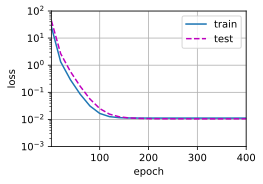

In [6]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### Linear Function Fitting (Underfitting)

When used to fit nonlinear patterns
(like the third-order polynomial function here)
linear models are liable to underfit.

weight: [[3.4482718 4.158016 ]]


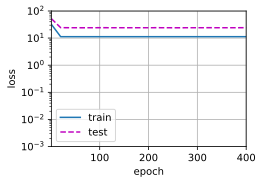

In [7]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### Higher-Order Polynomial Function Fitting (Overfitting)

Now let us try to train the model using a polynomial of too high degree. Here, there are insufficient data to learn that the higher-degree coefficients should have values close to zero. As a result, our overly-complex model is so susceptible that it is being influenced by noise in the training data. Though the training loss can be effectively reduced, the test loss is still much higher. It shows that the complex model overfits the data.

weight: [[ 4.983644    1.3261107  -3.3365107   5.091619   -0.1178332   1.0182028
   0.01319819 -0.08816323  0.01122191 -0.09579817  0.18987887 -0.08327065
  -0.08143129 -0.13004614  0.12505284 -0.06489049 -0.18093926 -0.22319812
   0.04167979 -0.14875552]]


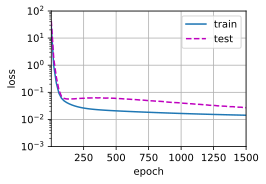

In [8]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

## Summary

* Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generalization error.
* A validation set can be used for model selection, provided that it is not used too liberally.
* Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.
* We should choose an appropriately complex model and avoid using insufficient training samples.

## Exercises

1. Can you solve the polynomial regression problem exactly? Hint: use linear algebra.
1. Consider model selection for polynomials:
    1. Plot the training loss vs. model complexity (degree of the polynomial). What do you observe? What degree of polynomial do you need to reduce the training loss to 0?
    1. Plot the test loss in this case.
    1. Generate the same plot as a function of the amount of data.
1. What happens if you drop the normalization ($1/i!$) of the polynomial features $x^i$? Can you fix this in some other way?
1. Can you ever expect to see zero generalization error?